In [1]:
import sys
!"{sys.executable}" -m pip install torch
!"{sys.executable}" -m pip uninstall transformers -y
!"{sys.executable}" -m pip install transformers
import sys
!"{sys.executable}" -m pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


Found existing installation: transformers 4.56.1
Uninstalling transformers-4.56.1:
  Successfully uninstalled transformers-4.56.1
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.0 MB 2.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/12.0 MB 2.9 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.0 MB 3.1 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/12.0 MB 3.5 MB/s eta 0:00:03
   -------------- ------------------------- 4.5/12.0 MB 3.7 MB/s eta 0:00:03
   ------------------- -------------------- 5.8/12.0 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.8/12.0 MB 4.3 MB/s eta 0:00:02
   -------------------------- ------------- 7.9/12.0 MB 4.4 MB/s eta 0:00:01
   ------------------------------- -------- 9.4/12.0 MB 4.7 MB/s eta 0:00:01
   ----------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


In [2]:
import sys
!"{sys.executable}" -m pip install nlp


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


In [3]:
# !pip install transformers
import pandas as pd
import numpy as np
from transformers import pipeline
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp

import torch
import torch.nn.functional as F

In [4]:
import sys
!"{sys.executable}" -m pip install datasets


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


In [5]:
import datasets
from datasets import load_dataset

print(datasets.__version__)

4.0.0


In [6]:
ds = load_dataset("poem_sentiment")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})


In [7]:
from datasets import load_dataset
ds_original_from_hf = load_dataset("poem_sentiment")
ds_original_from_hf

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

In [8]:
train_ds = ds_original_from_hf['train']
train_ds

Dataset({
    features: ['id', 'verse_text', 'label'],
    num_rows: 892
})

In [9]:
label_names = ds_original_from_hf['train'].features['label'].names
label_names

['negative', 'positive', 'no_impact', 'mixed']

In [10]:
print('Length of the Data', len(train_ds))
train_ds[0]

Length of the Data 892


{'id': 0,
 'verse_text': 'with pale blue berries. in these peaceful shades--',
 'label': 1}

In [11]:
train_ds.column_names

['id', 'verse_text', 'label']

In [12]:
train_ds.features

{'id': Value('int32'),
 'verse_text': Value('string'),
 'label': ClassLabel(names=['negative', 'positive', 'no_impact', 'mixed'])}

In [13]:
train_ds[:2]

{'id': [0, 1],
 'verse_text': ['with pale blue berries. in these peaceful shades--',
  'it flows so long as falls the rain,'],
 'label': [1, 2]}

In [14]:
train_ds['verse_text'][:2]

['with pale blue berries. in these peaceful shades--',
 'it flows so long as falls the rain,']

In [15]:
train = pd.DataFrame(ds_original_from_hf['train'])
train.head()

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3


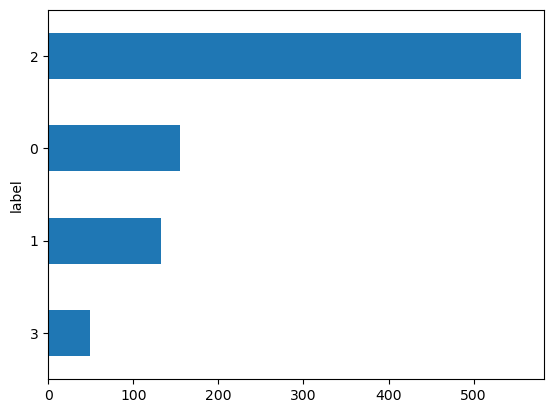

In [16]:
train['label'].value_counts(ascending=True).plot.barh()
plt.show()

## Tokenize

In [17]:
import sys
!"{sys.executable}" -m pip install --upgrade transformers
!"{sys.executable}" -m pip install --upgrade datasets


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/26.1 MB ? eta -:--:--
    --------------------------------------- 0.5/26.1 MB 2.5 MB/s eta 0:00:11
   -- ------------------------------------- 1.3/26.1 MB 3.0 MB/s eta 0:00:09
   --- ------------------------------------ 2.1/26.1 MB 3.6 MB/s eta 0:00:07
   ---- ----------------------------------- 3.1/26.1 MB 3.9 MB/s eta 0:00:06
   ------ --------------------------------- 3.9/26.1 MB 3.9 MB/s eta 0:00:06
   ------ --------------------------------- 4.5/26.1 MB 3.8 MB/s eta 0:00:06
   ------- -------------------------------- 4.7/26.1 MB 3.6 MB/s eta 0:00:06
   -------- ------------------------------- 5.2/26.1 MB 3.3 MB/s eta 0:00:07
   -------- ------------------------------- 5.5/26.1 MB 3.1 MB/s eta 0:00:07
   -------- ------------------------------- 5.8/26.1 MB 3.0 MB/s eta 0:00:07
   --------- ------------------------------ 6.3/26.1 MB 2.8 MB/s eta 0:00:08
   ---------- ----------------------------- 6.6/26.1 MB 2.8 MB/s eta 0:00:08
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


In [18]:
from transformers import AutoTokenizer
model_cpkt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_cpkt)

In [19]:
print('tokenizer vocab size: ',tokenizer.vocab_size)
print('model max length: ',tokenizer.model_max_length)
print('Feature name: ',tokenizer.model_input_names)

tokenizer vocab size:  30522
model max length:  512
Feature name:  ['input_ids', 'attention_mask']


In [20]:
def tokenize(batch):
    return tokenizer(batch["verse_text"], padding=True, truncation=True)

In [21]:
print(tokenize(ds_original_from_hf["train"][:2]))

{'input_ids': [[101, 2007, 5122, 2630, 22681, 1012, 1999, 2122, 9379, 13178, 1011, 1011, 102], [101, 2009, 6223, 2061, 2146, 2004, 4212, 1996, 4542, 1010, 102, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]}


In [22]:
from IPython.display import Image, display

display(Image(url='https://i.imgur.com/f7CHg4R.png', width=400))
display(Image(url='https://i.imgur.com/3RY8Gfl.png', width=400))

In [23]:
ds_pretrained_features_encoded = ds_original_from_hf.map(tokenize, batched=True, batch_size=None)
print('Feature Names of Dataset: ',ds_pretrained_features_encoded['train'].column_names)

Feature Names of Dataset:  ['id', 'verse_text', 'label', 'input_ids', 'attention_mask']


## Training the Text Classifier - DistilBERT
## Token Encoding > Token Embedding > Encoder Stack > Hidden States > Claasification Head > Prediction

## Using Pretrained Model - DistilBERT

In [24]:
!pip install torch torchvision torchaudio

In [25]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

Torch version: 2.7.1+cpu
CUDA available: False


In [26]:
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [27]:
def get_hidden_state(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return{'hidden_state': last_hidden_state[:,0].cpu().numpy()}
    
ds_pretrained_features_encoded.set_format('torch', columns = ["input_ids", "attention_mask", "label"])
pretrained_hidden_states = ds_pretrained_features_encoded.map(get_hidden_state, batched=True)
pretrained_hidden_states['train'].column_names

Map:   0%|          | 0/892 [00:00<?, ? examples/s]

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [28]:
pretrained_hidden_states

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 104
    })
})

In [29]:
X_train = np.array(pretrained_hidden_states['train']['hidden_state'])
X_valid = np.array (pretrained_hidden_states['validation']["hidden_state"])

y_train = np.array (pretrained_hidden_states ["train"]["label"])
y_valid = np.array (pretrained_hidden_states["validation"]["label"])

In [30]:
import sys
!"{sys.executable}" -m pip uninstall -y umap
!"{sys.executable}" -m pip install umap-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


In [31]:
import umap.umap_ as umap
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler

X_train_scaled = MinMaxScaler().fit_transform(X_train)
mapper = umap.UMAP(n_components=2, metric='cosine').fit(X_train_scaled)
df_embedded_from_hidden = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_embedded_from_hidden['label'] = y_train
display(df_embedded_from_hidden.head())

,X,Y,label
0,-1.888059,0.891313,1
1,2.459925,2.501906,2
2,-0.174638,3.884973,0
3,2.973831,2.987650,3
4,-0.247921,2.155971,3


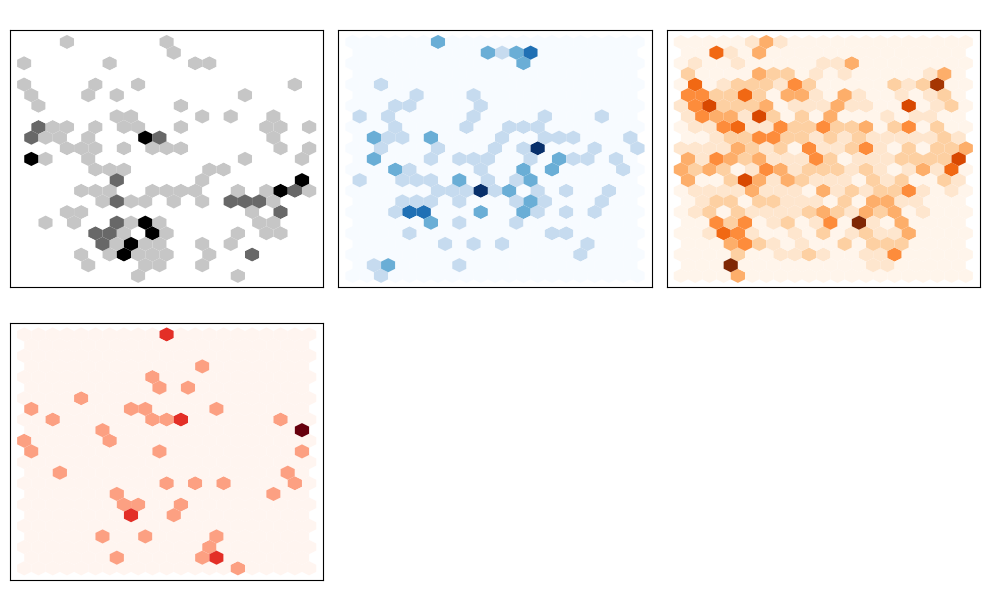

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = ds_original_from_hf["train"].features["label"].names

for i, (label_name, cmap) in enumerate(zip(labels, cmaps)):
    # Filtering for the correct label index
    label_index = labels.index(label_name)
    df_label = df_embedded_from_hidden.query(f"label == {label_index}")
    axes[i].hexbin(
        df_label["X"], df_label["Y"],
        cmap=cmap, gridsize=20,
        linewidths=0, edgecolors="face"
    )
    axes[i].set_title(label_name, color="white")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
for ax in axes[4:]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.show()

## Training - Logistic Classifier

In [33]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train,y_train)
print('Logistic Regression Score: ', lr_clf.score(X_valid, y_valid))

Logistic Regression Score:  0.780952380952381


## Dummy Classifier

In [34]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
print(dummy_clf.score(X_valid, y_valid))

0.6571428571428571


## Fine-Tuning DistilBERT

In [35]:
from transformers import AutoModelForSequenceClassification
num_labels = len(ds_original_from_hf['train'].features['label'].names)

model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device))

from sklearn.metrics import accuracy_score, f1_score

def compute_metric(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = 'weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': 1}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training

In [36]:
import sys
!"{sys.executable}" -m pip uninstall -y accelerate transformers
!"{sys.executable}" -m pip install "transformers[torch]" accelerate>=0.26.0

Found existing installation: accelerate 1.9.0
Uninstalling accelerate-1.9.0:
  Successfully uninstalled accelerate-1.9.0
Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\SYED SARAFEENA ALI\anaconda\python.exe -m pip install --upgrade pip


In [37]:
import transformers, accelerate
print("transformers:", transformers.__version__)
print("accelerate:", accelerate.__version__)

transformers: 4.57.1
accelerate: 1.9.0


In [38]:
from transformers import Trainer,TrainingArguments
batch_size = 12
logging_steps = len(ds_pretrained_features_encoded['train']) //batch_size
model_name = f"{model_ckpt}-finetune-poem"

training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  logging_strategy="steps",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error"
                                 )

In [39]:
trainer = Trainer(model=model, args=training_args,compute_metrics=compute_metric,
                  train_dataset = ds_pretrained_features_encoded['train'],
                  eval_dataset = ds_pretrained_features_encoded["validation"],
                  tokenizer = tokenizer
                  )
trainer.train()

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_11888\438785338.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,compute_metrics=compute_metric,
C:\Users\SYED SARAFEENA ALI\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.034500,0.763168,0.657143,1
2,0.713800,0.570985,0.838095,1


C:\Users\SYED SARAFEENA ALI\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\SYED SARAFEENA ALI\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=150, training_loss=0.872719742457072, metrics={'train_runtime': 175.4424, 'train_samples_per_second': 10.169, 'train_steps_per_second': 0.855, 'total_flos': 12924311538432.0, 'train_loss': 0.872719742457072, 'epoch': 2.0})

In [40]:
preds_output = trainer.predict(ds_pretrained_features_encoded['validation'])

C:\Users\SYED SARAFEENA ALI\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [41]:
preds_output.metrics

{'test_loss': 0.5709848999977112,
 'test_accuracy': 0.8380952380952381,
 'test_f1': 1,
 'test_runtime': 1.5174,
 'test_samples_per_second': 69.196,
 'test_steps_per_second': 5.931}

## Error Analysis - detecting wrong labels by comparing them with the actual labels

In [42]:
from torch.nn.functional import cross_entropy

def forward_pass_with_loss_and_label (batch):
    inputs = {k:v.to(device) for k, v in batch.items()
                if k in tokenizer.model_input_names}

    with torch.no_grad():
         output = model(**inputs)
         pred_label = torch.argmax(output.logits, axis=-1)
         loss = cross_entropy(output.logits, batch['label'].to(device), reduction='none')
    
    return {'Loss ': loss.cpu().numpy(), 'predicted_labels ': pred_label.cpu().numpy()}

In [43]:
#hide_output
#Convert our dataset back to PyTorch tensors
ds_pretrained_features_encoded.set_format('torch', columns=["input_ids", "attention_mask", "label"])

#Compute loss values
ds_pretrained_features_encoded['validation'] = ds_pretrained_features_encoded["validation"].map(forward_pass_with_loss_and_label, batched = True, batch_size=16)

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

In [44]:
pred = trainer.predict(ds_pretrained_features_encoded["validation"])

C:\Users\SYED SARAFEENA ALI\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [45]:
import numpy as np
import torch

logits = pred.predictions
label_ids = pred.label_ids
pred_ids = np.argmax(logits, axis=-1)
per_sample_loss = torch.nn.functional.cross_entropy(
    torch.tensor(logits), torch.tensor(label_ids), reduction="none"
).numpy()

# Convert validation split to pandas DataFrame
ds_pretrained_features_encoded.set_format("pandas")
df_val = ds_pretrained_features_encoded["validation"][:]

# Inject loss and prediction columns
df_val["loss"] = per_sample_loss
df_val["predicted_label"] = pred_ids

# Convert back to Hugging Face Dataset
from datasets import Dataset
ds_pretrained_features_encoded["validation"] = Dataset.from_pandas(df_val)

In [46]:
ds_pretrained_features_encoded.set_format("pandas")

cols = ["verse_text", "label", "predicted_label", "loss"]
df_test = ds_pretrained_features_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

df_test.sort_values("loss", ascending=False).head(10)

NameError: name 'label_int2str' is not defined

In [ ]:
df_test.sort_values("loss", ascending=True).head(10)